


___
# Ciência dos Dados - PROJETO 1

## Roberto Franco
___

## Análise de interferência da renda na utilização da internet 

___
## Introdução

Análise da interferência da renda no acesso e utilização dos serviços de internet por meio de dados referentes ao acesso à Internet realizado dos seguintes modos: internet em domicio, internet via 3G,  através de conexão discada por linha telefônica e internet via banda larga.


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
D:\betof\Documents\ciencia dos dados\GIT\Ciencia_dos_dados


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [155]:
dados_2013 = pd.read_excel('DOM_2013.xlsx') # lendo a planilha

DR_2013 = dados_2013.loc[3:,["Column3","Column29","Column50","Column56","Column57","Column58","Column78"]] # escolhendo as colunas
DR_2013.head()

,Column3,Column29,Column50,Column56,Column57,Column58,Column78
3,11,2.0,4.0,NaN,NaN,NaN,350.0
4,11,2.0,4.0,NaN,NaN,NaN,339.0
5,11,2.0,4.0,NaN,NaN,NaN,266.0
6,11,2.0,4.0,NaN,NaN,NaN,400.0
7,11,2.0,4.0,NaN,NaN,NaN,411.0


In [80]:
DR_2013.Column3 = DR_2013.Column3.astype('category')
DR_2013.Column29 = DR_2013.Column29.astype('category')
DR_2013.Column50 = DR_2013.Column50.astype('category')
DR_2013.Column56 = DR_2013.Column56.astype('category')
DR_2013.Column57 = DR_2013.Column57.astype('category')
DR_2013.Column58 = DR_2013.Column58.astype('category')
DR_2013.Column78 = DR_2013.Column78.astype('float')

DR_2013.columns = ["UF", "CELULAR", "NET_DOM", "NET_3G","NET_TEL","NET_BL","RENDA"] # alterando os nomes das colunas

# alterando as variaveis: 
DR_2013.CELULAR.cat.categories = (['Sim', 'Nao'])
DR_2013.NET_DOM.cat.categories = (["Sim","Nao"])
DR_2013.NET_3G.cat.categories = (["Sim","Nao"])
DR_2013.NET_TEL.cat.categories = (["Sim","Nao"])
DR_2013.NET_BL.cat.categories = (["Sim","Nao"])

DR_2013.to_csv("Dados_resumidos_2013") # salvar no excel
DR_2013 = DR_2013[DR_2013.RENDA!=999999999999] # tirando os dados invalidos (9999999999)


AttributeError: 'DataFrame' object has no attribute 'Column3'

In [84]:
DR_2013.RENDA.describe()
#faixa = range(0,82000,1000)
faixa = [0, 500, 1000, 2000,3000,5000, 10000, 20000, 82000] # FAZER POR SALARIO - CLASSE SALARIAL

faixa_classes = [162,291,441,641,1019,2480,82000] # segundo G1: http://g1.globo.com/economia/seu-dinheiro/noticia/2013/08/veja-diferencas-entre-conceitos-que-definem-classes-sociais-no-brasil.html
RENDA_cat = pd.cut(DR_2013.RENDA, bins=faixa)
RENDA_cat_classes = pd.cut(DR_2013.RENDA, bins=faixa_classes)

RENDA_FAIXA = RENDA_cat.value_counts()
RENDA_FAIXA_CLASSES = RENDA_cat_classes.value_counts()

DR_2013["FAIXA_RENDA"] = RENDA_cat # criando uma nova coluna
DR_2013["FAIXA_RENDA_CLASSES"] = RENDA_cat_classes # criando uma nova coluna 

DR_2013.FAIXA_RENDA_CLASSES.cat.categories = (['vuneravel', 'baixa classe M', 'media classe M','alta classe M','baixa classe A','alta classe A'])



In [132]:
# porcentagem de pessoas que possuem as variáveis, por faixas de renda

ct_renda_net_2013 = pd.crosstab(DR_2013.FAIXA_RENDA_CLASSES, DR_2013.NET_DOM,normalize="index")*100

ct_renda_3G_2013 = pd.crosstab(DR_2013.FAIXA_RENDA_CLASSES, DR_2013.NET_3G,normalize="index")*100

ct_renda_celular_2013= pd.crosstab(DR_2013.FAIXA_RENDA_CLASSES, DR_2013.CELULAR,normalize="index")*100

ct_renda_net_tel_2013 = pd.crosstab(DR_2013.FAIXA_RENDA_CLASSES, DR_2013.NET_TEL,normalize="index")*100

ct_renda_net_bl_2013 = pd.crosstab(DR_2013.FAIXA_RENDA_CLASSES, DR_2013.NET_BL,normalize="index")*100


In [144]:
#ct_renda_celular_2013.plot(kind='bar', color=('blue', 'red'),legend=True, title = 'pessoas que tem celular 2013')
#ct_renda_net_2013.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet em domicilio 2013')
#plt.show()
#ct_renda_3G_2013.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet 3G - 2013')
#plt.show()
#ct_renda_net_tel_2013.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet por linha telefonica 2013')
#plt.show()
#ct_renda_net_bl_2013.plot(kind='bar', color=('blue', 'red'),legend=True, title = 'pessoas que tem internet por banda larga 2013')

In [145]:
#DR_2013.boxplot(column = "RENDA", by = "NET_DOM")

In [146]:
PND_2013 = DR_2013.NET_DOM.value_counts(normalize = True)*100

#PND_2013.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net em domicio') # em porcentagem

#plt.show()

PN_3G_2013 = DR_2013.NET_3G.value_counts(normalize = True)*100

#PN_3G_2013.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net 3G') # em porcentagem

#plt.show()

PN_BL_2013 = DR_2013.NET_BL.value_counts(normalize = True)*100

#PN_BL_2013.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net Banda Larga')

#plt.show()

PN_TEL_2013 = DR_2013.NET_TEL.value_counts(normalize = True)*100

#PN_TEL_2013.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net por linha telefonica')


In [147]:
#ct_NR.plot(kind='hist', color=('blue', 'red'),legend=True,bins = faixa, normed = True)

In [148]:
# PARA OS OUTROS ANOS: (2014)

dados_2014 = pd.read_excel('DOM_2014.xlsx') # lendo a planilha

DR_2014 = dados_2014.loc[3:,["Column3","Column29","Column50","Column56","Column57","Column58","Column78"]] # escolhendo as colunas

DR_2014.Column3 = DR_2014.Column3.astype('category')
DR_2014.Column29 = DR_2014.Column29.astype('category')
DR_2014.Column50 = DR_2014.Column50.astype('category')
DR_2014.Column56 = DR_2014.Column56.astype('category')
DR_2014.Column57 = DR_2014.Column57.astype('category')
DR_2014.Column58 = DR_2014.Column58.astype('category')
DR_2014.Column78 = DR_2014.Column78.astype('float')

DR_2014.columns = ["UF", "CELULAR", "NET_DOM", "NET_3G","NET_TEL","NET_BL","RENDA"] # alterando os nomes das colunas

# alterando as variaveis: 
DR_2014.CELULAR.cat.categories = (['Sim', 'Nao'])
DR_2014.NET_DOM.cat.categories = (["Sim","Nao"])
DR_2014.NET_3G.cat.categories = (["Sim","Nao"])
DR_2014.NET_TEL.cat.categories = (["Sim","Nao"])
DR_2014.NET_BL.cat.categories = (["Sim","Nao"])

DR_2014.to_csv("Dados_resumidos_2013") # salvar no excel
DR_2014 = DR_2014[DR_2014.RENDA!=999999999999] # tirando os dados invalidos (9999999999)
#DR_2013
#----------------------------------------------------------------

DR_2014.RENDA.describe()
#faixa = range(0,82000,1000)
faixa = [0, 500, 1000, 2000,3000,5000, 10000, 20000, 82000] # FAZER POR SALARIO - CLASSE SALARIAL

faixa_classes = [162,291,441,641,1019,2480,82000] # segundo G1: http://g1.globo.com/economia/seu-dinheiro/noticia/2013/08/veja-diferencas-entre-conceitos-que-definem-classes-sociais-no-brasil.html
RENDA_cat = pd.cut(DR_2014.RENDA, bins=faixa)
RENDA_cat_classes = pd.cut(DR_2014.RENDA, bins=faixa_classes)

RENDA_FAIXA = RENDA_cat.value_counts()
RENDA_FAIXA_CLASSES = RENDA_cat_classes.value_counts()

DR_2014["FAIXA_RENDA"] = RENDA_cat # criando uma nova coluna
DR_2014["FAIXA_RENDA_CLASSES"] = RENDA_cat_classes # criando uma nova coluna 

DR_2014.FAIXA_RENDA_CLASSES.cat.categories = (['vuneravel', 'baixa classe M', 'media classe M','alta classe M','baixa classe A','alta classe A'])

ct_renda_net_2014 = pd.crosstab(DR_2014.FAIXA_RENDA_CLASSES, DR_2014.NET_DOM,normalize="index")*100

ct_renda_3G_2014 = pd.crosstab(DR_2014.FAIXA_RENDA_CLASSES, DR_2014.NET_3G,normalize="index")*100

ct_renda_celular_2014= pd.crosstab(DR_2014.FAIXA_RENDA_CLASSES, DR_2014.CELULAR,normalize="index")*100

ct_renda_net_tel_2014 = pd.crosstab(DR_2014.FAIXA_RENDA_CLASSES, DR_2014.NET_TEL,normalize="index")*100

ct_renda_net_bl_2014 = pd.crosstab(DR_2014.FAIXA_RENDA_CLASSES, DR_2014.NET_BL,normalize="index")*100

#ct_renda_celular_2014.plot(kind='bar', color=('blue', 'red'),legend=True, title = 'pessoas que tem celular 2014')
#plt.show()
#ct_renda_net_2014.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet em domicilio 2014')
#plt.show()
#ct_renda_3G_2014.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet 3G - 2014')
#plt.show()
#ct_renda_net_tel_2014.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet por linha telefonica 2014')
#plt.show()
#ct_renda_net_bl_2014.plot(kind='bar', color=('blue', 'red'),legend=True, title = 'pessoas que tem internet por banda larga 2014')

#plt.show()
PND_2014 = DR_2014.NET_DOM.value_counts(normalize = True)*100

#PND_2014.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net em domicio 2014') # em porcentagem

#plt.show()

PN_3G_2014 = DR_2014.NET_3G.value_counts(normalize = True)*100

#PN_3G_2014.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net 3G - 2014') # em porcentagem

#plt.show()

PN_BL_2014 = DR_2014.NET_BL.value_counts(normalize = True)*100

#PN_BL_2014.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net Banda Larga 2014')

#plt.show()

PN_TEL_2014 = DR_2014.NET_TEL.value_counts(normalize = True)*100

#PN_TEL_2014.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net por linha telefonica 2014')


In [149]:
# PARA OS OUTROS ANOS: (2015)

dados_2015 = pd.read_excel('DOM_2014.xlsx') # lendo a planilha

DR_2015 = dados_2015.loc[3:,["Column3","Column29","Column50","Column56","Column57","Column58","Column78"]] # escolhendo as colunas

DR_2015.Column3 = DR_2015.Column3.astype('category')
DR_2015.Column29 = DR_2015.Column29.astype('category')
DR_2015.Column50 = DR_2015.Column50.astype('category')
DR_2015.Column56 = DR_2015.Column56.astype('category')
DR_2015.Column57 = DR_2015.Column57.astype('category')
DR_2015.Column58 = DR_2015.Column58.astype('category')
DR_2015.Column78 = DR_2015.Column78.astype('float')

DR_2015.columns = ["UF", "CELULAR", "NET_DOM", "NET_3G","NET_TEL","NET_BL","RENDA"] # alterando os nomes das colunas

# alterando as variaveis: 
DR_2015.CELULAR.cat.categories = (['Sim', 'Nao'])
DR_2015.NET_DOM.cat.categories = (["Sim","Nao"])
DR_2015.NET_3G.cat.categories = (["Sim","Nao"])
DR_2015.NET_TEL.cat.categories = (["Sim","Nao"])
DR_2015.NET_BL.cat.categories = (["Sim","Nao"])

DR_2015.to_csv("Dados_resumidos_2013") # salvar no excel
DR_2015 = DR_2015[DR_2015.RENDA!=999999999999] # tirando os dados invalidos (9999999999)
#DR_2013
#----------------------------------------------------------------

DR_2015.RENDA.describe()
#faixa = range(0,82000,1000)
faixa = [0, 500, 1000, 2000,3000,5000, 10000, 20000, 82000] # FAZER POR SALARIO - CLASSE SALARIAL

faixa_classes = [162,291,441,641,1019,2480,82000] # segundo G1: http://g1.globo.com/economia/seu-dinheiro/noticia/2013/08/veja-diferencas-entre-conceitos-que-definem-classes-sociais-no-brasil.html
RENDA_cat = pd.cut(DR_2014.RENDA, bins=faixa)
RENDA_cat_classes = pd.cut(DR_2015.RENDA, bins=faixa_classes)

RENDA_FAIXA = RENDA_cat.value_counts()
RENDA_FAIXA_CLASSES = RENDA_cat_classes.value_counts()

DR_2015["FAIXA_RENDA"] = RENDA_cat # criando uma nova coluna
DR_2015["FAIXA_RENDA_CLASSES"] = RENDA_cat_classes # criando uma nova coluna 

DR_2015.FAIXA_RENDA_CLASSES.cat.categories = (['vuneravel', 'baixa classe M', 'media classe M','alta classe M','baixa classe A','alta classe A'])

ct_renda_net_2015 = pd.crosstab(DR_2015.FAIXA_RENDA_CLASSES, DR_2015.NET_DOM,normalize="index")*100

ct_renda_3G_2015 = pd.crosstab(DR_2015.FAIXA_RENDA_CLASSES, DR_2015.NET_3G,normalize="index")*100

ct_renda_celular_2015= pd.crosstab(DR_2015.FAIXA_RENDA_CLASSES, DR_2015.CELULAR,normalize="index")*100

ct_renda_net_tel_2015 = pd.crosstab(DR_2015.FAIXA_RENDA_CLASSES, DR_2015.NET_TEL,normalize="index")*100

ct_renda_net_bl_2015 = pd.crosstab(DR_2015.FAIXA_RENDA_CLASSES, DR_2015.NET_BL,normalize="index")*100

#ct_renda_celular_2015.plot(kind='bar', color=('blue', 'red'),legend=True, title = 'pessoas que tem celular 2015')
#plt.show()
#ct_renda_net_2015.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet em domicilio 2015')
#plt.show()
#ct_renda_3G_2015.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet 3G - 2015')
#plt.show()
#ct_renda_net_tel_2015.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet por linha telefonica 2015')
#plt.show()
#ct_renda_net_bl_2015.plot(kind='bar', color=('blue', 'red'),legend=True, title = 'pessoas que tem internet por banda larga 2015')

#plt.show()
PND_2015 = DR_2015.NET_DOM.value_counts(normalize = True)*100

#PND_2015.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net em domicio 2015') # em porcentagem

#plt.show()

PN_3G_2015 = DR_2015.NET_3G.value_counts(normalize = True)*100

#PN_3G_2015.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net 3G - 2015') # em porcentagem

#plt.show()

PN_BL_2015 = DR_2015.NET_BL.value_counts(normalize = True)*100

#PN_BL_2015.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net Banda Larga 2015')

#plt.show()

PN_TEL_2015 = DR_2015.NET_TEL.value_counts(normalize = True)*100

#PN_TEL_2015.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net por linha telefonica 2015')


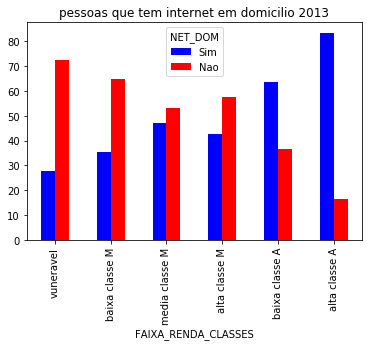

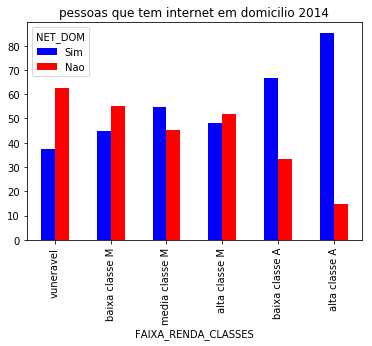

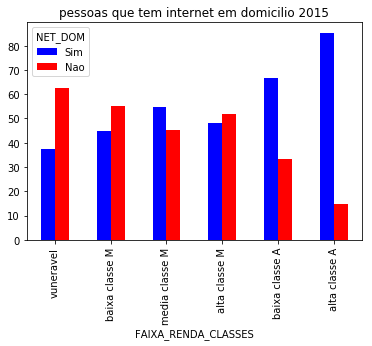

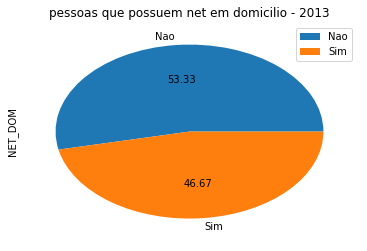

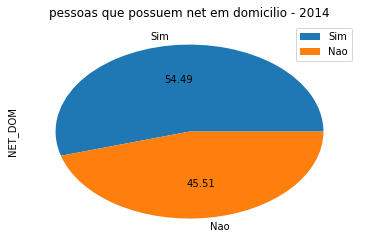

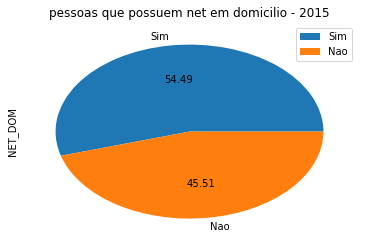

In [153]:
#comparando anos: NET DOMICILO

ct_renda_net_2013.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet em domicilio 2013')
plt.show()
ct_renda_net_2014.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet em domicilio 2014')
plt.show()
ct_renda_net_2015.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet em domicilio 2015')
plt.show()
PND_2013.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net em domicilio - 2013') # em porcentagem
plt.show()
PND_2014.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net em domicilio - 2014') # em porcentagem
plt.show()
PND_2015.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net em domicilio - 2015') # em porcentagem
plt.show()
# em 2013: pode-se notar que o uso da net em domicilio esta concentrado nas classes mais altas, portanto é um serviço caro, porém há porcentagens relativamente grandes mesmo para as classes bem baixas, logo é considerada por muitos um serviço essencial

# em 2014: houve um aumento no uso da internet em domicilio(7,82%) no uso de internet em domicio, principalmente para as classes baixas, portanto o serviço barateou 

# de 2014 para 2015: nao houve aumentos

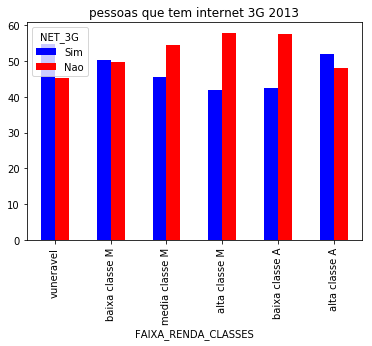

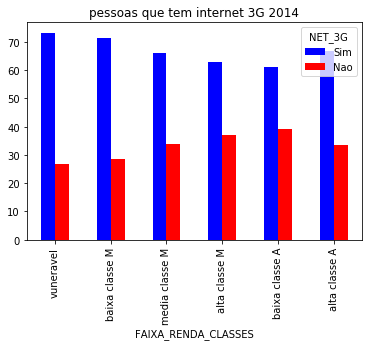

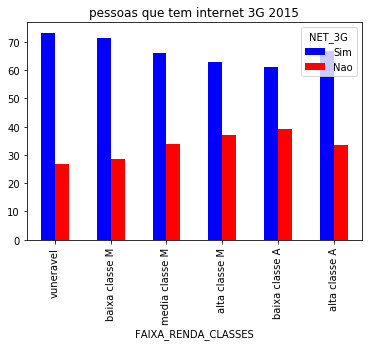

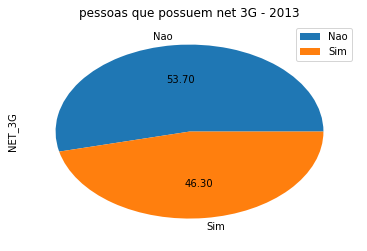

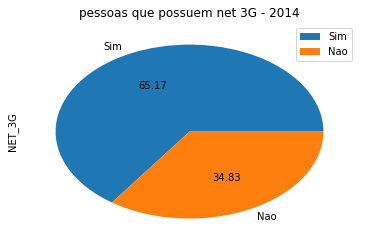

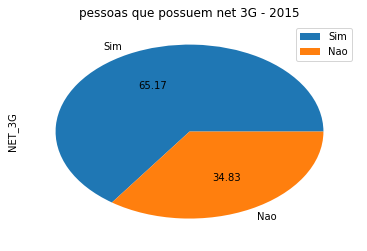

In [151]:
#comparando anos: NET 3G

ct_renda_3G_2013.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet 3G 2013')
plt.show()
ct_renda_3G_2014.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet 3G 2014')
plt.show()
ct_renda_3G_2015.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet 3G 2015')
plt.show()

PN_3G_2013.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net 3G - 2013') # em porcentagem
plt.show()
PN_3G_2014.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net 3G - 2014') # em porcentagem
plt.show()
PN_3G_2015.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net 3G - 2015') # em porcentagem
plt.show()

#de 2013 para 2014: aumento de 18,87 percentual no uso do 3G (para todas as faixas)
#de 2014 para 2015: nao houve grandes aumentos

# em 2013: pode-se notar que mesmo entre as classes altas nao há nem 50% de uso, portanto alem de cara nao é considerada essencial

# em 2014: pode-se notar que subiu muito a utilizacao mesmo entre as classes baixas, portanto barateou muito 

# em 2015: pode-se notar que nao houve aumento, ficou estagnada. Portanto o preço estabilizou e uso tb 


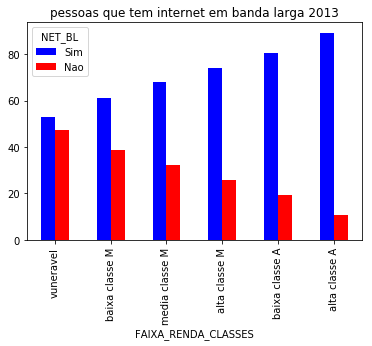

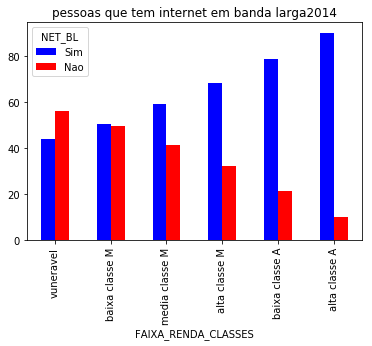

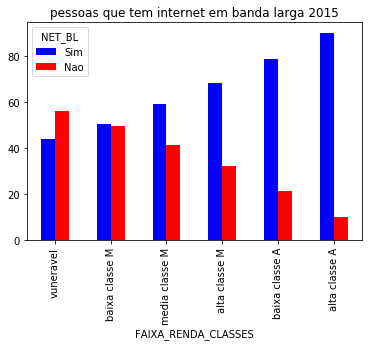

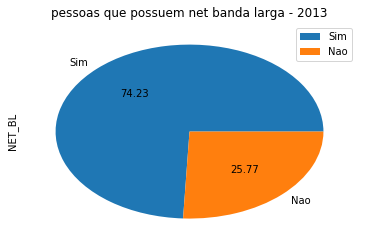

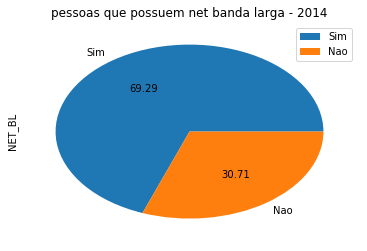

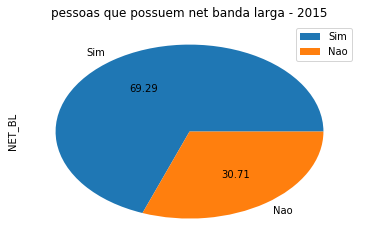

In [143]:
#comparando anos: NET BANDA LARGA


ct_renda_net_bl_2013.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet em banda larga 2013')
plt.show()
ct_renda_net_bl_2014.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet em banda larga2014')
plt.show()
ct_renda_net_bl_2015.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet em banda larga 2015')
plt.show()

PN_BL_2013.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net banda larga - 2013') # em porcentagem
plt.show()
PN_BL_2014.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net banda larga - 2014') # em porcentagem
plt.show()
PN_BL_2015.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net banda larga - 2015') # em porcentagem
plt.show()

#em 2013: pode-se notar que a banda larga nao é um serviço caro, pois grande parte da população utiliza seu serviço

#em 2014: queda de 4,94 percentual no uso de net banda larga (para todas as faixas), porem a queda se localiza mais nas classes baixas, portanto o serviço encareceu
#de 2014 para 2015: nao houve grandes aumentos

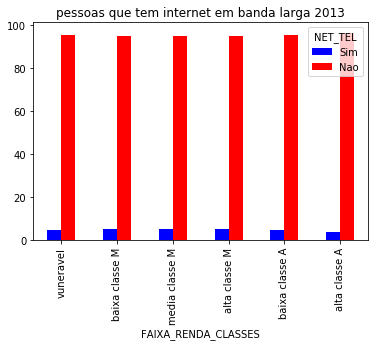

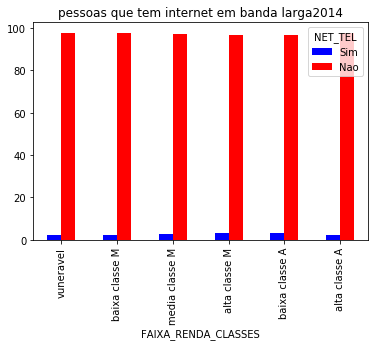

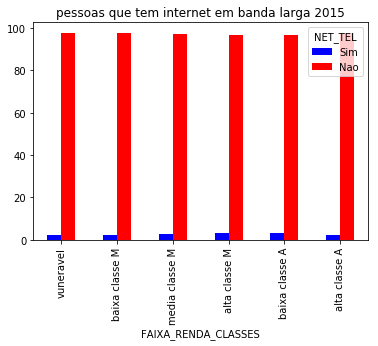

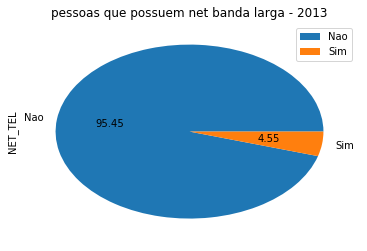

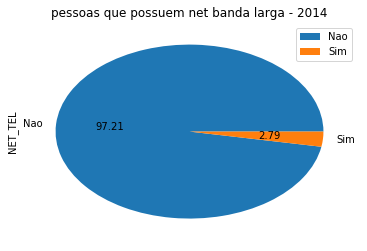

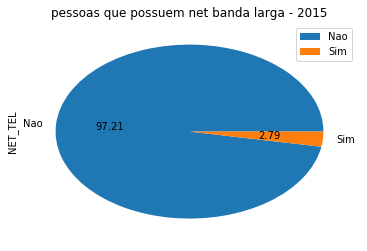

In [156]:
#comparando anos: NET TELEFONE


ct_renda_net_tel_2013.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet em banda larga 2013')
plt.show()
ct_renda_net_tel_2014.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet em banda larga2014')
plt.show()
ct_renda_net_tel_2015.plot(kind='bar', color=('blue', 'red'),legend=True,title = 'pessoas que tem internet em banda larga 2015')
plt.show()

PN_TEL_2013.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net banda larga - 2013') # em porcentagem
plt.show()
PN_TEL_2014.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net banda larga - 2014') # em porcentagem
plt.show()
PN_TEL_2015.plot(kind='pie',autopct = '%0.2f',legend = True, title = 'pessoas que possuem net banda larga - 2015') # em porcentagem
plt.show()


___
## Conclusão 

    Ao analisar como o acesso e utilização dos serviços de internet se comporta para as diferentes classes sociais, percebe-se que não é possível generalizar entre os diversos tipos de conexão ao serviço e portanto parte a necessidade que decompo-lo em alguns tipos, no caso foram nas formas de pessoas que utilizam os serviços de: Internet em domicilio, 3G, Banda larga e Internet por conexão discada por linha telefonica. Sendo o último descartado por ter índices muitos baixos e não favorecer a pesquisa
    
   ## Internet em domicílio
    
    Analizando o uso de internet em domicilio percebe-se que há uma concentração nas classes mais altas, portanto pode ser considerado um serviço caro, porém apesar de serem pequenas as porcentagens para as classes baixas (abaixo de 30% para a classe vunerável por exemplo) observando em relação a renda dessas classes e observando também que a quase totalidade das classes altas a possuem pode-se dizer que é considerado um serviço essencial. Ao análisar com o passar dos anos, percebe-se que em 2014 houve um aumento de 7,82% no uso do serviço, concentrado em grande parte nas classes baixas, logo o serviço barateou. Já em 2015 não houve grandes mudaças.
    
   ## Internet 3G 
    
    Já para o serviço de 3G, ao percebe-se que em 2013 o serviço não era muito utilizado por nenhuma das classes, porém também pode ser considerado caro pois concentra-se nas classes altas. De 2013 para 2014 o serviço cresceu muito (18,87%), de tal modo que as classes baixas superaram as classes altas, portanto além de baratear, o serviço não parece ser considerado essencial para as classes mais altas. Em 2015 não houve grandes mudanças.
    
   ## internet Banda Larga
    
    Para o serviço de banda larga, nota-se que grande parte da população utiliza-a, portanto não é considerada um serviço caro. Em 2014 houve uma queda de 4,94%, localizada mais nas classes baixas, portanto o serviço sofreu um pequeno aumento em seu preço. Para 2015 não houve grandes mudanças.